# Kohonen SOFM

In [ ]:
#install.packages("kohonen")

In [1]:
library(kohonen)

# UCI Wine Data

In [52]:
URL = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
RED.WINE=read.csv(URL,header=TRUE,sep=";")
WINE.DATA=as.matrix(RED.WINE[,1:11])
FEATURES=head(colnames(WINE.DATA),11)
options(width=60)
print(FEATURES)

 [1] "fixed.acidity"        "volatile.acidity"    
 [3] "citric.acid"          "residual.sugar"      
 [5] "chlorides"            "free.sulfur.dioxide" 
 [7] "total.sulfur.dioxide" "density"             
 [9] "pH"                   "sulphates"           
[11] "alcohol"             


In [24]:
CLASSES=classvec2classmat(RED.WINE[,"quality"])
head(CLASSES)

3,4,5,6,7,8
0,0,1,0,0,0
0,0,1,0,0,0
0,0,1,0,0,0
0,0,0,1,0,0
0,0,1,0,0,0
0,0,1,0,0,0


## Default version of scale(M) will turn columns into columns of z-values. 
## Let $\mu_i$ be the mean of column $i$ ($n$ = number of rows, $x_{ij}$ is $j^{th}$ entry in column $i$):
## $$\mu_i = \dfrac{1}{n}\sum_j x_{ij}$$
## Let $\sigma_i$ be the standard deviation of column $i$
## $$\sigma_i^2 =\dfrac{1}{n-1}\sum_j (x_{ij} - \mu_j)^2$$
## scaled version of $j^{th}$ entry in column $i$ is:
## $$z_{ij} = \dfrac{x_{ij} - \mu_i}{\sigma_i}$$

In [25]:
scaled.WINE=scale(WINE.DATA)

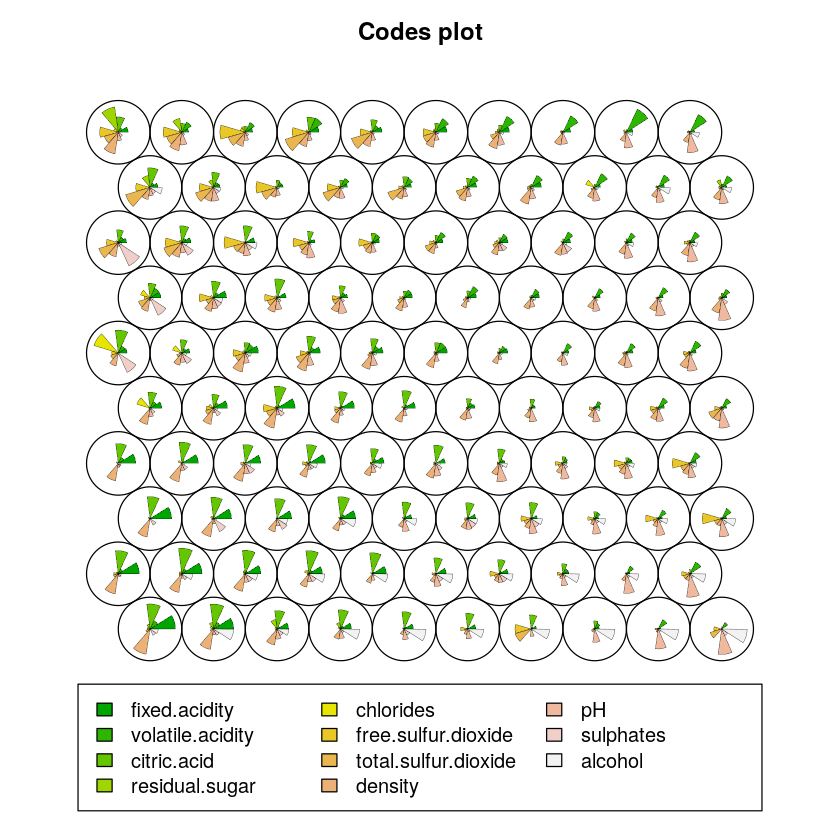

In [26]:
SOM.UNSUPERVISED=som(scaled.WINE, grid=somgrid(10,10,"hexagonal"))
#pdf("SOM-UNSUP-CODES.pdf")
plot(SOM.UNSUPERVISED)
#dev.off()

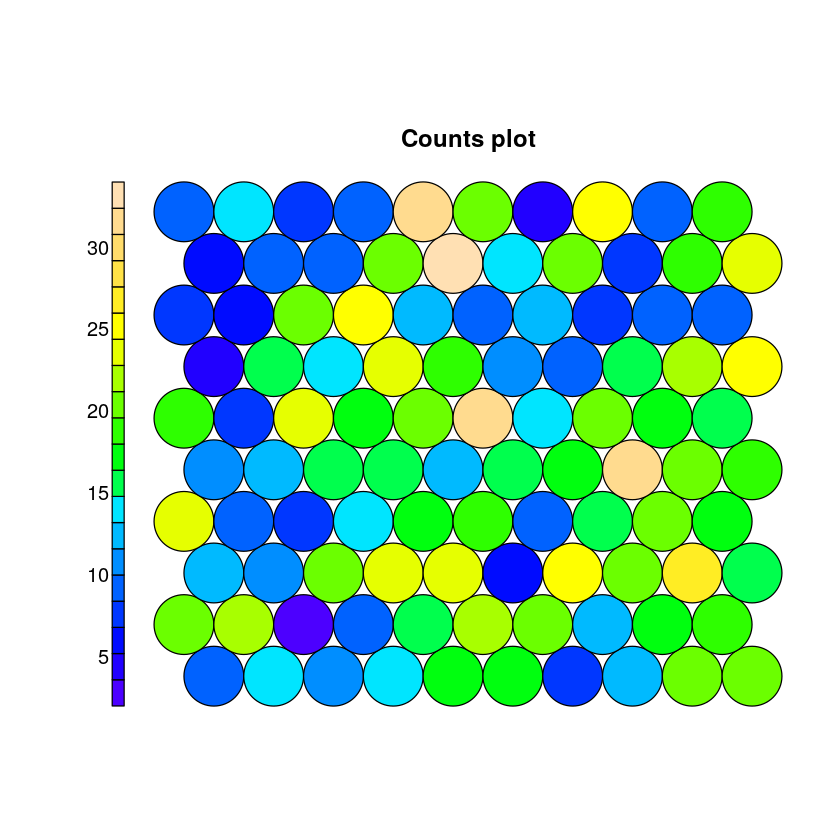

In [27]:
#pdf("SOM-UNSUP-COUNTS.pdf")
plot(SOM.UNSUPERVISED,type="counts", palette.name=topo.colors)
#dev.off()

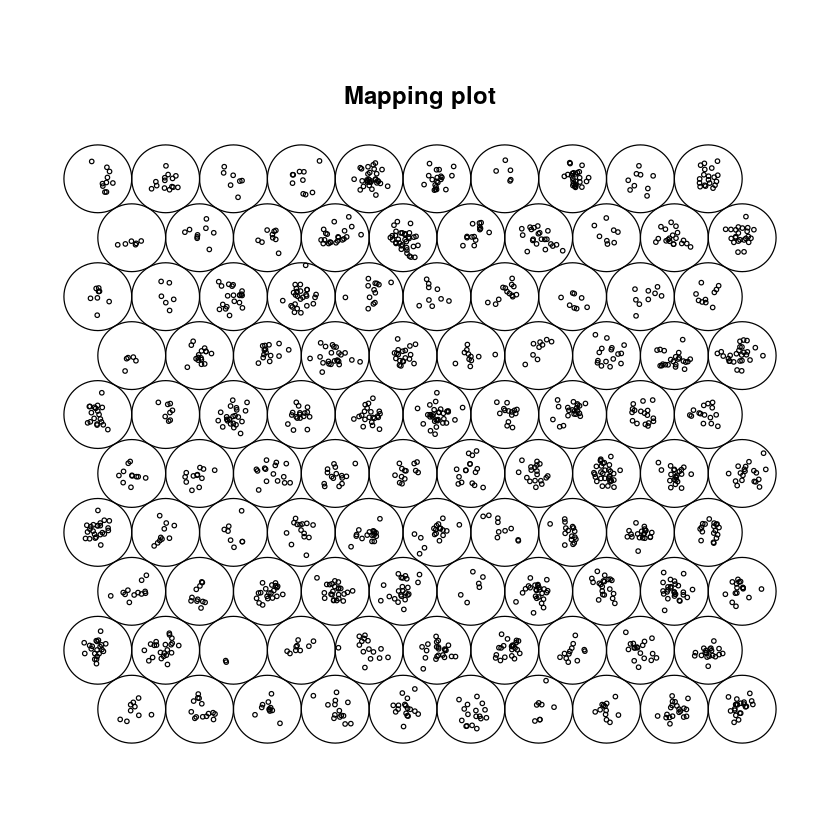

In [28]:
#pdf("SOM-UNSUP-MAPPING.pdf")
plot(SOM.UNSUPERVISED, type="mapping", cex=.5)
#dev.off()

# Supervised version

In [29]:
FEATURES

[1] "fixed.acidity"        "volatile.acidity"     "citric.acid"         
 [4] "residual.sugar"       "chlorides"            "free.sulfur.dioxide" 
 [7] "total.sulfur.dioxide" "density"              "pH"                  
[10] "sulphates"            "alcohol"

In [32]:
SOM = xyf(scaled.WINE,
         CLASSES,
         grid=somgrid(7,7,"hexagonal"),
         rlen=100,
         user.weight=.5)

mfrow gives a multi-paneled plot row

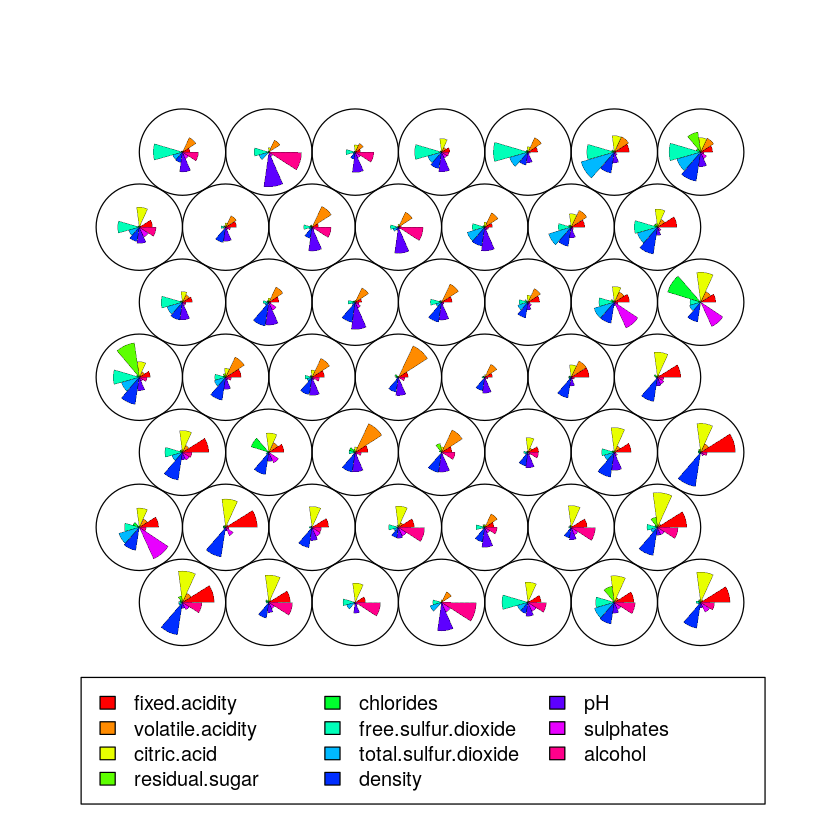

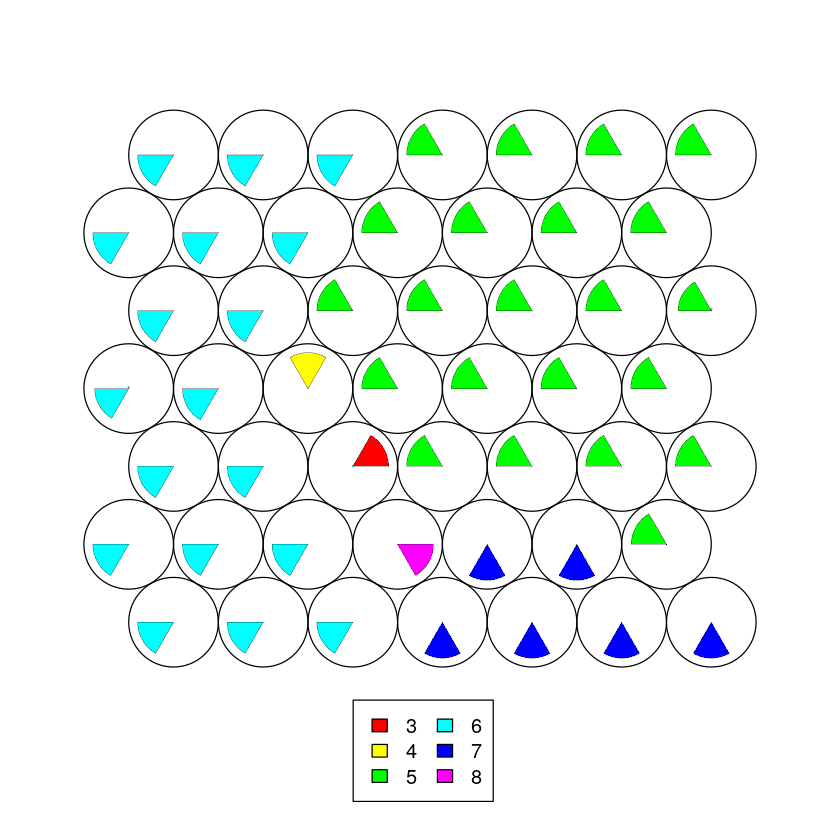

In [51]:
#pdf("SOM-SUP-CODES.pdf")
#par(mfrow=c(1,2))
plot(SOM,type="codes", main="",palette.name=rainbow)
#dev.off()

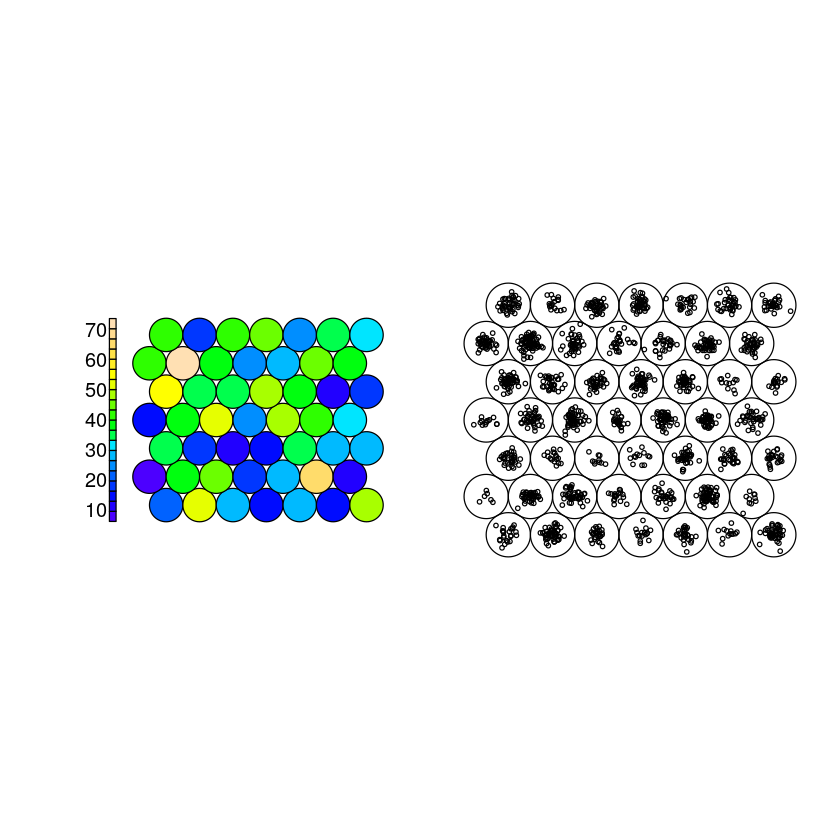

In [50]:
par(mfrow=c(1,2))
#pdf("SOM-SUP-COUNTS.pdf")
plot(SOM,type="counts", palette.name=topo.colors,main="")
#dev.off()
#pdf("SOM-SUP-MAPPING.pdf")
plot(SOM, type="mapping", cex=.5,main="")
#dev.off()